# 练习 15.1：立方

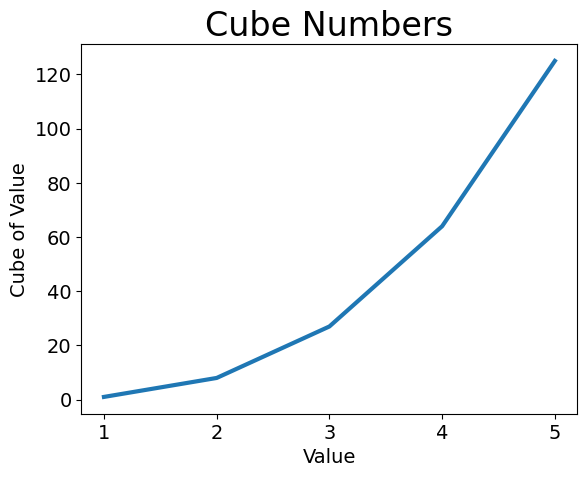

In [1]:
import matplotlib.pyplot as plt

input_values = [1,2,3,4,5]
cubes = [1,8,27,64,125]

fig, ax = plt.subplots()
ax.plot(input_values, cubes, linewidth=3)

#设置图题并给坐标轴加上标签
ax.set_title("Cube Numbers", fontsize=24)
ax.set_xlabel("Value", fontsize=14)
ax.set_ylabel("Cube of Value", fontsize=14)

#设置刻度标记的样式
ax.tick_params(labelsize=14)

plt.show()

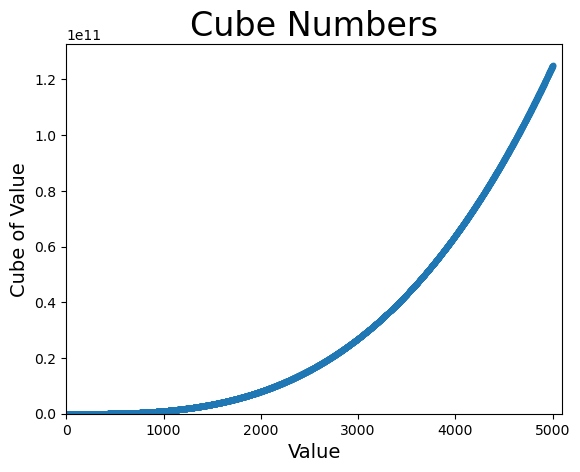

In [4]:
import matplotlib.pyplot as plt

x_values = range(1,5001)
y_values = [x**3 for x in x_values]
fig, ax = plt.subplots()
ax.scatter(x_values, y_values, s=10)

#设置图题并给坐标轴加上标签
ax.set_title("Cube Numbers", fontsize=24)
ax.set_xlabel("Value", fontsize=14)
ax.set_ylabel("Cube of Value", fontsize=14)

#设置每个坐标轴的取值范围
ax.axis([0, 5100, 0, 132651000000])

plt.show()

# 练习15.2 彩色立方

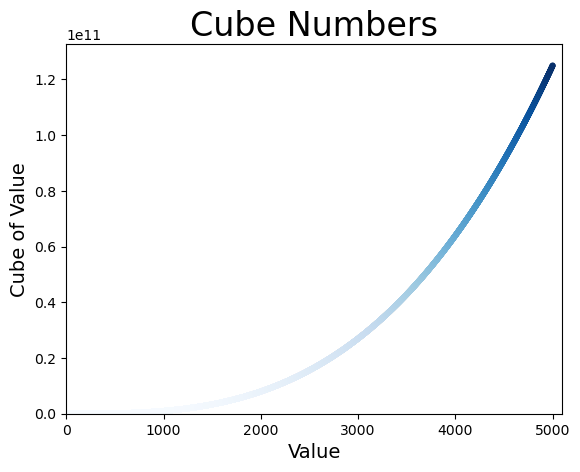

In [5]:
import matplotlib.pyplot as plt

x_values = range(1,5001)
y_values = [x**3 for x in x_values]
fig, ax = plt.subplots()
ax.scatter(x_values, y_values, c=y_values, cmap=plt.cm.Blues, s=10)

#设置图题并给坐标轴加上标签
ax.set_title("Cube Numbers", fontsize=24)
ax.set_xlabel("Value", fontsize=14)
ax.set_ylabel("Cube of Value", fontsize=14)

#设置每个坐标轴的取值范围
ax.axis([0, 5100, 0, 132651000000])

plt.show()

# 练习 15.3 分子运动

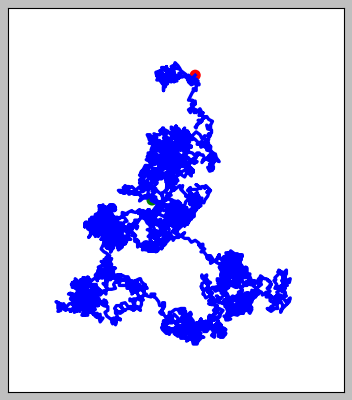

Make another walk? (y/n): y


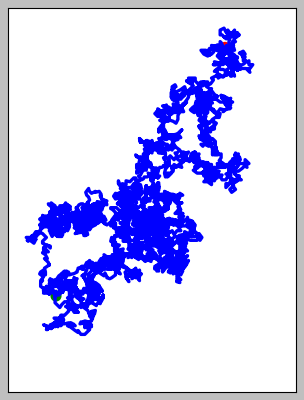

Make another walk? (y/n): n


In [9]:
import matplotlib.pyplot as plt
from random_walk import RandomWalk

#只要程序处于活跃状态，就不断地模拟随机游走
while True:
    #创建一个RandomWalk实例
    rw = RandomWalk(5000)
    rw.fill_walk()

    #将所有的点都绘制出来
    plt.style.use('classic')
    fig, ax = plt.subplots()
    point_numbers = range(rw.num_points)
    ax.plot(rw.x_values, rw.y_values, linewidth=3)
    ax.set_aspect('equal') #指定两条轴上刻度间距必须相等
    
    #突出起点和终点
    ax.scatter(0,0, c='green', edgecolors='none', s=100)
    ax.scatter(rw.x_values[-1], rw.y_values[-1], c='red', edgecolors='none', s=100)

    #隐藏坐标轴
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    plt.show()

    keep_running = input("Make another walk? (y/n): ")
    if keep_running == 'n':
        break

# 练习15.4 改进随机游走

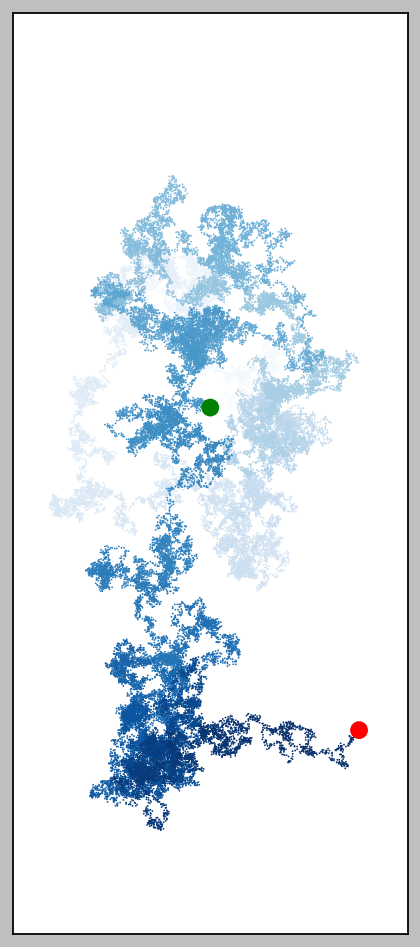

Make another walk? (y/n): y


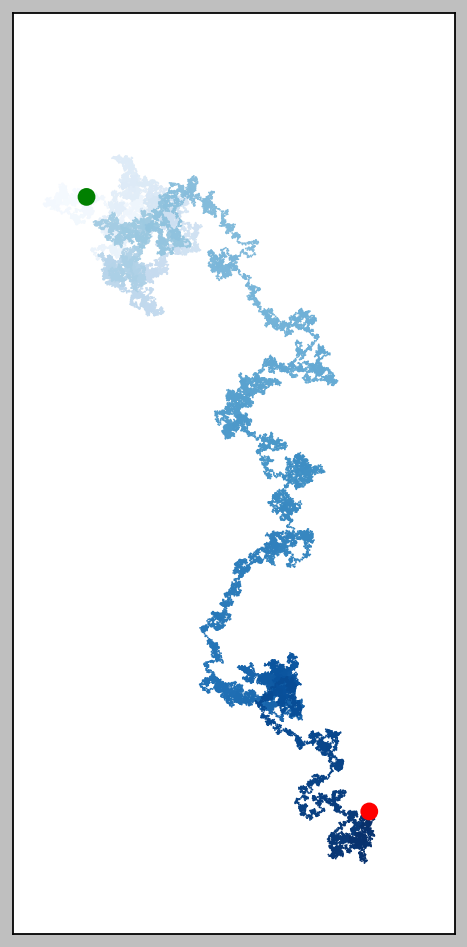

Make another walk? (y/n): n


In [8]:
import matplotlib.pyplot as plt
from random_walk import RandomWalk

#只要程序处于活跃状态，就不断地模拟随机游走
while True:
    #创建一个RandomWalk实例
    rw = RandomWalk(50_000)
    rw.fill_walk()

    #将所有的点都绘制出来
    plt.style.use('classic')
    fig, ax = plt.subplots(figsize= (15,9), dpi=128)
    point_numbers = range(rw.num_points)
    ax.scatter(rw.x_values, rw.y_values, c=point_numbers, cmap=plt.cm.Blues, edgecolors='none', s=1)
    ax.set_aspect('equal') #指定两条轴上刻度间距必须相等
    
    #突出起点和终点
    ax.scatter(0,0, c='green', edgecolors='none', s=100)
    ax.scatter(rw.x_values[-1], rw.y_values[-1], c='red', edgecolors='none', s=100)

    #隐藏坐标轴
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    plt.show()

    keep_running = input("Make another walk? (y/n): ")
    if keep_running == 'n':
        break

# 练习 15.5 重构

In [ ]:
from random import choice

class RandomWalk:
    """一个生成随机游走数据的类"""
    
    def __init__(self, num_points=5000):
        """初始化随机游走的属性"""
        self.num_points = num_points
        
        #所有随机游走都始于（0，0）
        self.x_values = [0]
        self.y_values = [0]

    def get_step():
        """确定每次游走的距离和方向"""
        directions = choice([1, -1])
        distance = choice([0, 1, 2, 3, 4])
        return directions*distance

    def fill_walk(self):
        """计算随机游走包含的所有点"""
        
        #不断游走，直到列表达到指定长度
        while len(self.x_values) < self.num_points:
            
            #决定前进的方向以及沿这个方向前进的距离
            x_step = self.get_step()
            y_step = self.get_step()
            
            #拒绝原地踏步
            if x_step == 0 and y_step == 0:
                continue
                
            #计算下一个点的x坐标值与y坐标值
            x = self.x_values[-1] + x_step
            y = self.y_values[-1] + y_step
            
            self.x_values.append(x)
            self.y_values.append(y)

# 练习 15.6 两个D8

In [3]:
import plotly.express as px
from die import Die

# 创建两个D8
die_1 = Die(8)
die_2 = Die(8)

# 掷几次骰子并将结果存储在一个列表中
results = []
for roll_num in range(1000):
    result = die_1.roll() + die_2.roll()
    results.append(result)

# 分析结果
frequencies = []
max_result = die_1.num_sides + die_2.num_sides
poss_results = range(2, max_result+1)
for value in poss_results:
    frequency = results.count(value)
    frequencies.append(frequency)

# 对结果进行可视化
title = "Results of Rolling Two D8 1000 Times"
labels = {'x':'Result', 'y':'Frequency of Result'}
fig = px.bar(x=poss_results, y=frequencies, title = title, labels = labels)

# 进一步定制图形
fig.update_layout(xaxis_dtick=1)

fig.show()

# 练习 15.7 同时掷三个骰子

In [4]:
import plotly.express as px
from die import Die

# 创建三个D6
die_1 = Die()
die_2 = Die()
die_3 = Die()

# 掷几次骰子并将结果存储在一个列表中
results = []
for roll_num in range(1000):
    result = die_1.roll() + die_2.roll() + die_3.roll()
    results.append(result)

# 分析结果
frequencies = []
max_result = die_1.num_sides + die_2.num_sides + die_3.num_sides
poss_results = range(3, max_result+1)
for value in poss_results:
    frequency = results.count(value)
    frequencies.append(frequency)

# 对结果进行可视化
title = "Results of Rolling Three D6 1000 Times"
labels = {'x':'Result', 'y':'Frequency of Result'}
fig = px.bar(x=poss_results, y=frequencies, title = title, labels = labels)

# 进一步定制图形
fig.update_layout(xaxis_dtick=1)

fig.show()

# 练习15.8 将点数相乘

In [5]:
import plotly.express as px
from die import Die

# 创建两个D6
die_1 = Die()
die_2 = Die()

# 掷几次骰子并将结果存储在一个列表中
results = []
for roll_num in range(1000):
    result = die_1.roll() * die_2.roll()
    results.append(result)

# 分析结果
frequencies = []
max_result = die_1.num_sides * die_2.num_sides
poss_results = range(1, max_result+1)
for value in poss_results:
    frequency = results.count(value)
    frequencies.append(frequency)

# 对结果进行可视化
title = "Results of Rolling Two D6 1000 Times"
labels = {'x':'Result', 'y':'Frequency of Result'}
fig = px.bar(x=poss_results, y=frequencies, title = title, labels = labels)

# 进一步定制图形
fig.update_layout(xaxis_dtick=1)

fig.show()

# 练习 15.9 改用列表推导式

In [8]:
import plotly.express as px
from die import Die

# 创建两个D6
die_1 = Die()
die_2 = Die()

# 掷几次骰子并将结果存储在一个列表中
results = [die_1.roll() * die_2.roll() for _ in range(1000)]

# 分析结果
max_result = die_1.num_sides * die_2.num_sides
poss_results = range(1, max_result + 1)
frequencies = [results.count(value) for value in poss_results]

# 对结果进行可视化
title = "Results of Rolling Two D6 1000 Times"
labels = {'x': 'Result', 'y': 'Frequency of Result'}
fig = px.bar(x=poss_results, y=frequencies, title=title, labels=labels)

# 进一步定制图形
fig.update_layout(xaxis_dtick=1)

fig.show()